In [6]:
import pandas as pd

file_path = '학력_임금.csv'
data = pd.read_csv(file_path, encoding='cp949', header=1)

data.columns = ['회사규모', '학력별', '성별', '연령', '평균연령', '평균근속년수', '근로일수',
                '총근로시간', '소정실근로시간', '초과근로시간', '휴일근로시간', '월임금총액',
                '월급여', '정액급여', '근로자수']

# '월임금총액' 컬럼을 숫자로 변환
data['월임금총액'] = pd.to_numeric(data['월임금총액'], errors='coerce')
data = data.dropna(subset=['월임금총액'])

# 학력별 및 성별로 그룹화하여 평균 월임금 계산
education_gender_income = data.groupby(['학력별', '성별'])['월임금총액'].mean().reset_index()

# 결과 출력
print(education_gender_income)

    학력별 성별        월임금총액
0    고졸  남  3082.666667
1    고졸  여  2714.666667
2  대졸이상  남  3662.000000
3  대졸이상  여  3367.000000
4  전문대졸  남  3378.333333
5  전문대졸  여  2740.666667


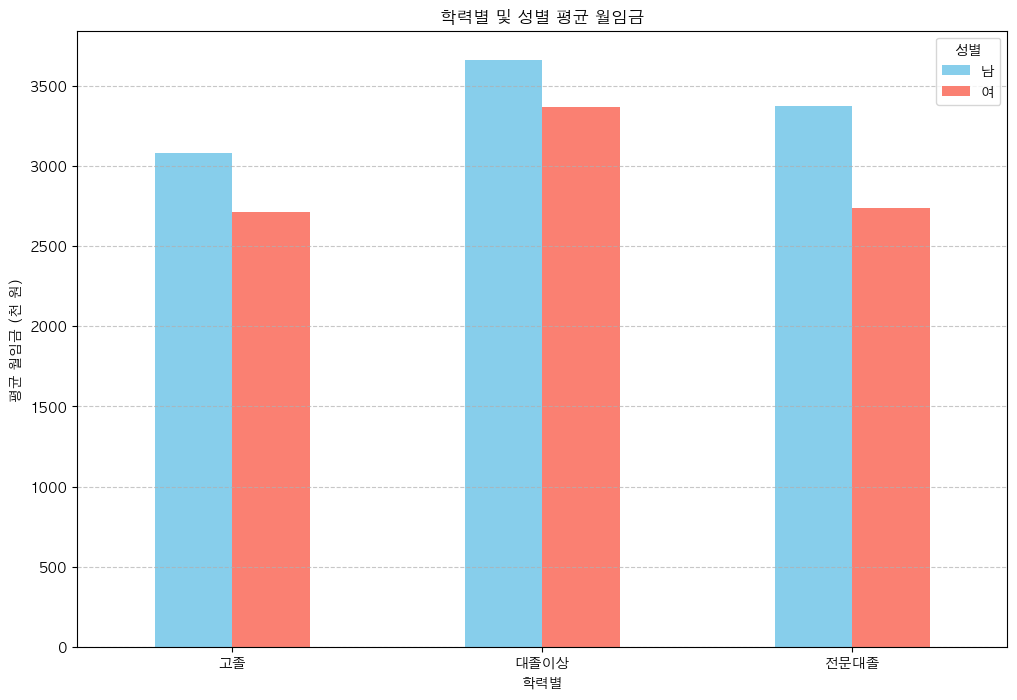

In [4]:
import matplotlib.pyplot as plt

plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 시각화를 위해 데이터 피벗팅
pivot_data = education_gender_income.pivot(index='학력별', columns='성별', values='월임금총액')
pivot_data.plot(kind='bar', figsize=(12, 8), color=['skyblue', 'salmon'])

plt.xlabel('학력별')
plt.ylabel('평균 월임금 (천 원)')
plt.title('학력별 및 성별 평균 월임금')
plt.xticks(rotation=0)
plt.legend(title='성별')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()